### Ex 1. Implement kmean algorithm by Numpy

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
class Kmean:
    def __init__(self, k, data):
        self._k = k
        self._x = np.array(data)
        self._mu = None
        self._flag = np.zeros(self._x.shape[0])
        
    def get_distortion(self):
        # distortion is the overall distance from each point to its centroid
        distortion = 0
        for i in range(self._x.shape[0]):
            label = int(self._flag[i])
            distortion += np.linalg.norm(self._x[i] - self._mu[label])
        return distortion
  
    def cluster(self, threshold):
        # initialize centroid vectors mu by randomly choose k datapoints
        x = self._x.copy()
        np.random.shuffle(x)
        self._mu = x[:self._k]
        last_mu = self._mu.copy()
        stop = np.ones(self._k)
        while True:
            # find closest centroid for each point
            for i in range(self._x.shape[0]):
                distances = ((self._x[i] - self._mu) ** 2).sum(axis=1)
                self._flag[i] = np.argmin(distances, axis = 0)
            # move centroids
            for k in range(self._mu.shape[0]):
                self._mu[k] = (self._x[self._flag == k]).mean(axis=0)
                stop[k] = ((self._mu[k] - last_mu[k]) ** 2).sum() >= 0.00001
            #if stop.sum() == 0: solution 1: converge criteria when centroids move just unremarkably
            #break
            distortion = self.get_distortion() / self._x.shape[0] # solution 2: converge criteria when distortion measure reaches a threshold
            if distortion <= threshold:
                break
            else:
                last_mu = self._mu
        return self._mu, self._flag
        
def visualize_data(data, label, centroids):
    for i in range(centroids.shape[0]):
        plt.scatter(data[label == i, 0], data[label == i, 1], alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c = 'cyan', s=100)

### Ex 2.

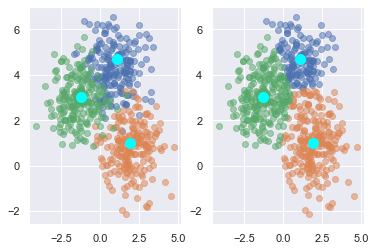

In [49]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

n_cluster = 3
x1, y1 = make_blobs(n_samples=600, centers=n_cluster, n_features=2, random_state=0)
k = Kmean(n_cluster, x1)
mu, f = k.cluster(threshold = 10)

plt.subplot(121)
visualize_data(x1, y1, mu)

plt.subplot(122)
visualize_data(x1, f, mu)

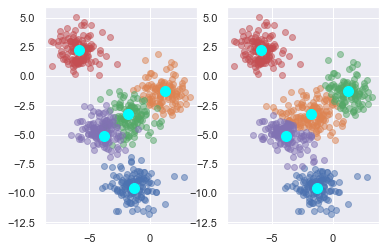

In [50]:
n_cluster = 5
x2, y2 = make_blobs(n_samples=600, centers=n_cluster, n_features=2, random_state=2)
k = Kmean(n_cluster, x2)
mu2, f2 = k.cluster(threshold=5)

plt.subplot(121)
visualize_data(x2, y2, mu2)

plt.subplot(122)
visualize_data(x2, f2, mu2)

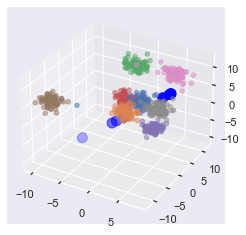

In [61]:
n_cluster = 8
x3, y3 = make_blobs(n_samples=600, centers=n_cluster, n_features=3, random_state=0)
k = Kmean(n_cluster, x3)
mu3, f3 = k.cluster(threshold = 4)
temp = np.vstack((x3, mu3))
y3 = np.concatenate((y3, np.arange(n_cluster)))
n = x3.shape[0]

ax1 = plt.axes(projection='3d')
for i in range(n_cluster):
    ax1.scatter3D(temp[y3 == i, 0], temp[y3 == i, 1], temp[y3 == i, 2], alpha=0.5)
ax1.scatter3D(temp[n:, 0], temp[n:, 0], temp[n:, 0], c='blue', marker='o', s=100)

### Ex 3.

### Ex 4.